### Importing necessary modules

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing csv file saved from last section Credit_card_Data_Wrangling

In [3]:
file = pd.read_csv('Credit_card_Data_Wrangling.csv', index_col = 'ID')

In [4]:
file.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


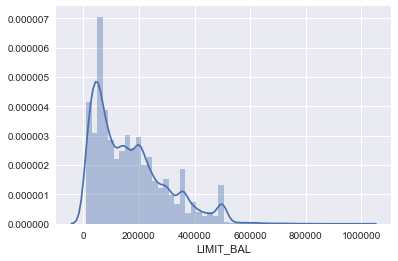

In [7]:
## LIMIT BALANCE

sns.distplot(file['LIMIT_BAL'])

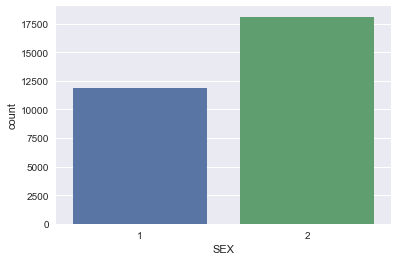

In [19]:
## Check the distribution of Male and Female in the Dataset

sns.countplot(x="SEX", data=file)

# From the plot its visible that # of Females(2) are higher that # of Males(1).
# So it is highly likely that # of Female defaulters will be more

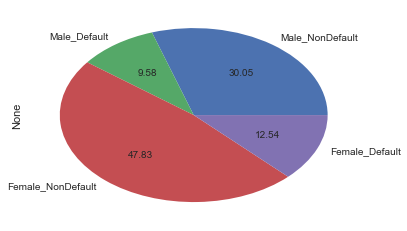

In [21]:
## Percent of male and female defaul/nodefault?
sex_def_pay = file.groupby(['SEX', 'default payment next month']).size()
sex_def_pay.plot.pie(labels = ['Male_NonDefault','Male_Default', 'Female_NonDefault','Female_Default'],autopct='%.2f')

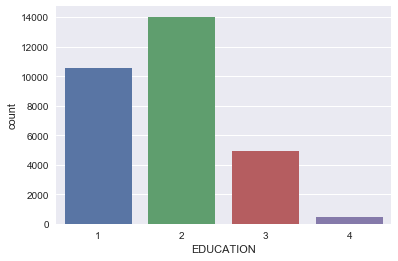

In [26]:
## Education

# 1 -> Graduate School

# 2 -> University

# 3 -> High School

# 4 -> Others

sns.countplot(x = 'EDUCATION', data= file)

# The dataset contains 14000 instances of people who have been to University, 
# more that 10,000 who have attended graduate school, nearly 4500 with high school education 

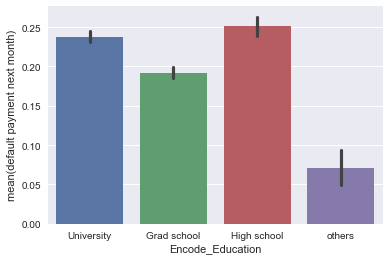

In [31]:
# Are less educated people likely to default?

file['Encode_Education']=file.EDUCATION.map({1:'Grad school', 2:'University', 3:'High school', 4:'others'})

sns.barplot(x='Encode_Education',y='default payment next month', data=file)



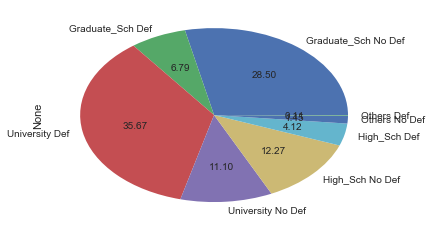

In [37]:
education_def_pay = file.groupby(['EDUCATION','default payment next month']).size()
education_def_pay.plot.pie(labels = ['Graduate_Sch No Def','Graduate_Sch Def','University Def','University No Def','High_Sch No Def','High_Sch Def','Others No Def','Others Def'],autopct='%.2f')

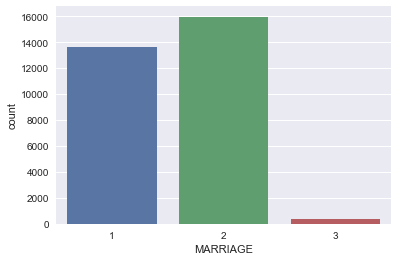

In [33]:
###  Marriage 

# 1 -> Married

# 2 -> Single

# 3 -> Others

sns.countplot(x = 'MARRIAGE', data= file)

# Distribution of Marriage

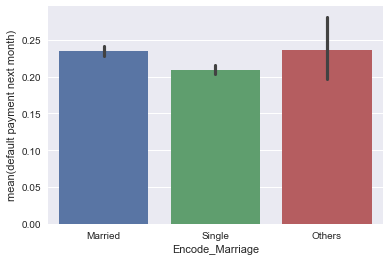

In [35]:
## Are married people less likely to default as compared to others/singles?

file['Encode_Marriage'] = file.MARRIAGE.map({1: 'Married',2:'Single',3:'Others'})

sns.barplot(x='Encode_Marriage',y='default payment next month', data=file)

## It doesn't look like there is any relation betwwen marriage and defaulters

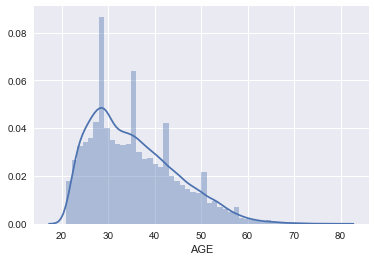

In [38]:
# AGE
sns.distplot(file['AGE'])

#Looks like majority of credit card holders were between age 20-50

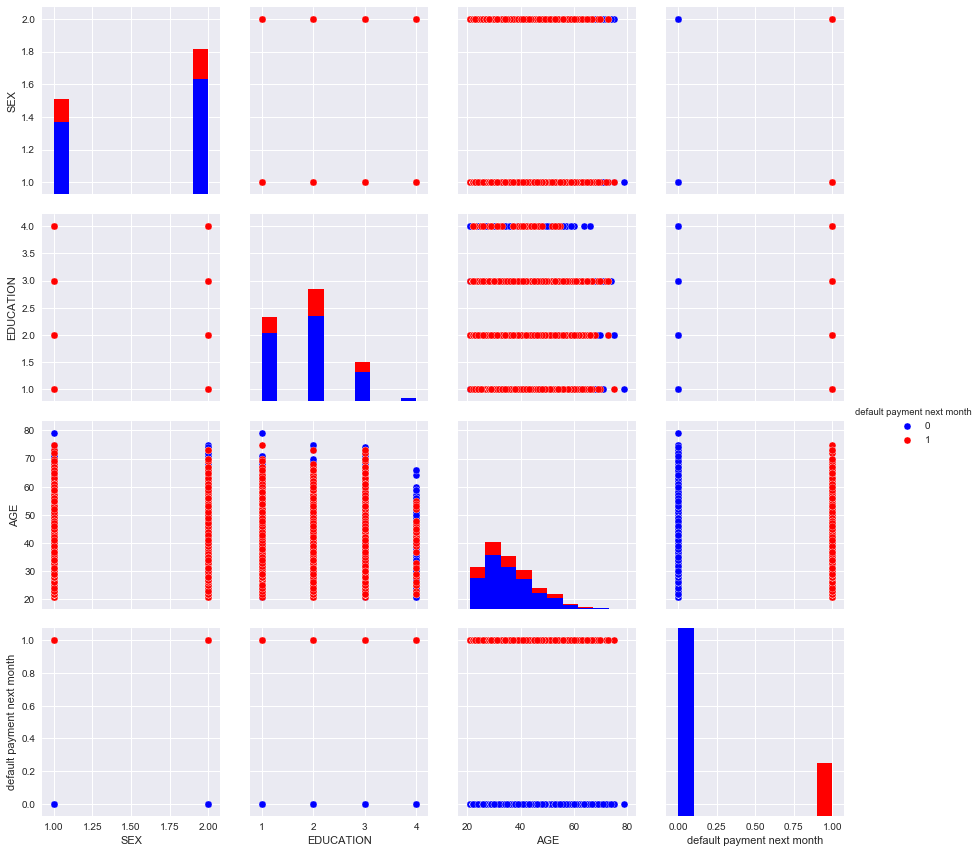

In [65]:
## Pairplot for categorical variables and default payment
sns.pairplot(file[['SEX','EDUCATION', 'AGE','default payment next month']], hue='default payment next month', size=3,palette={1:'Red',0:'Blue'})

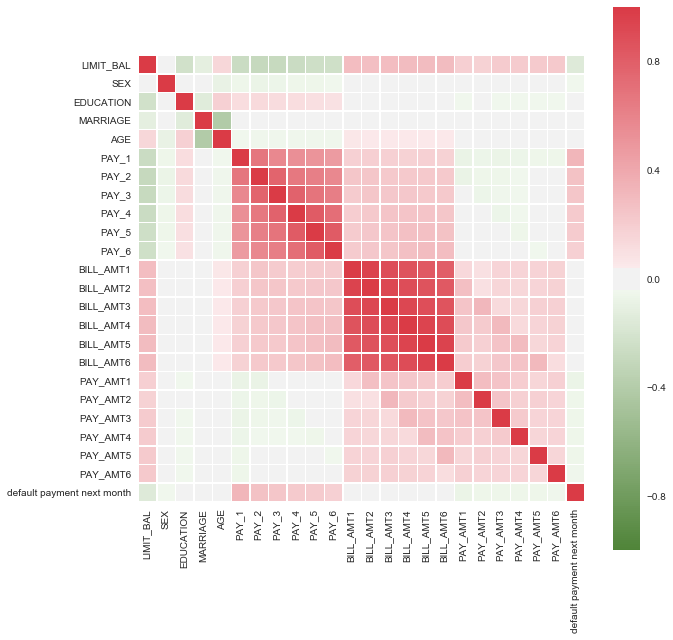

In [67]:
correlation = file.corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, cmap=cmap,center=0,
            square=True, linewidths=.5)